Notebook for 2.) Annotation Quality 2nd a.), b.) and c.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix
from spellchecker import SpellChecker
from matplotlib.ticker import PercentFormatter

In [2]:
# Path to the .npz file
DATASET_PATH = "../../MLPC2025_dataset"

ANNOTATIONS_PATH = DATASET_PATH + "/annotations.csv"
ANNOTATIONS_TEXT_EMBEDDINGS_PATH = DATASET_PATH + "/annotations_text_embeddings.npz"

metadata_path = DATASET_PATH + "/metadata.csv"
METADATA_TITLE_EMBEDDINGS_PATH = DATASET_PATH + "/metadata_title_embeddings.npz"
METADATA_KEYWORDS_EMBEDDINGS_PATH = DATASET_PATH + "/metadata_keywords_embeddings.npz"

AUDIO_PATHS = DATASET_PATH + "/audio"
AUDIO_FEATURES_PATHS = DATASET_PATH + "/audio_features"

In [3]:
annotations = pd.read_csv(ANNOTATIONS_PATH)
annotations.head()

,task_id,filename,annotator,text,onset,offset,filename_unsafe
0,161977861,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,16.552368,17.271435,560761_tufted titmouse calling.mp3
1,161987165,240538.mp3,4916274343929406460752597829190197300566135449...,A cow bell clinging repeatedly,12.265866,15.420303,240538_AMB - Cowbell stable Stereowav.mp3
2,161989998,660337.mp3,8960534646813062318784592632173589349806817458...,A child speaks with a high-pitched voice,12.493984,13.315680,660337_Aeroplane Takeoff From Cabinwav.mp3
3,161978339,725686.mp3,4540509031938851510799116530500792274849113758...,A high pitch meowing coming from a cat,16.018221,16.991704,725686_Black Cat Talking.mp3
4,161985729,97606.mp3,1085174475307080254018414698413953957857995126...,An extremely loud brushing sound on a construc...,0.000000,1.626352,97606_jackhammer med distwav.mp3


In [4]:
# Remove unnecessary columns for this task
annotations = annotations.drop(columns=['task_id', 'filename_unsafe', 'onset', 'offset'])
annotations['original_index'] = annotations.index
annotations.head()

,filename,annotator,text,original_index
0,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,0
1,240538.mp3,4916274343929406460752597829190197300566135449...,A cow bell clinging repeatedly,1
2,660337.mp3,8960534646813062318784592632173589349806817458...,A child speaks with a high-pitched voice,2
3,725686.mp3,4540509031938851510799116530500792274849113758...,A high pitch meowing coming from a cat,3
4,97606.mp3,1085174475307080254018414698413953957857995126...,An extremely loud brushing sound on a construc...,4


In [5]:
metadata = pd.read_csv(metadata_path)
metadata.head()

,filename,keywords,freesound_id,sound_link,manufacturer,license,title,description,num_downloads,geotag,start_time_s,end_time_s
0,617030.mp3,"atmosphere, general-noise, suburban, ambiance,...",617030,https://freesound.org/people/klankbeeld/sounds...,klankbeeld,https://creativecommons.org/licenses/by/4.0/,suburb night NL 1041PM 210415_0279.wav,Night in a suburban city. All sounds far. Tra...,65,51.7090740261 5.30657821347,15.6,43.535
1,637408.mp3,"jackhammer, construction, reflected",637408,https://freesound.org/people/kyles/sounds/637408/,kyles,http://creativecommons.org/publicdomain/zero/1.0/,construction jackhammer reflected5.flac,construction jackhammer reflected5\n\nrecorded...,23,NaN,209.8,232.356
2,615545.mp3,"river-side, field-recording, bell, fields, vil...",615545,https://freesound.org/people/klankbeeld/sounds...,klankbeeld,https://creativecommons.org/licenses/by/4.0/,4 church-bells 7AM at river NL 210718_0304.wav,Four differed church bells tell it is 7 o’cloc...,227,51.7405127581 5.23133654974,6.0,31.666
3,410867.mp3,"sports-crowd, applause, crowd, crowd-cheer, Ad...",410867,https://freesound.org/people/NobodyYouKnowOf/s...,NobodyYouKnowOf,http://creativecommons.org/publicdomain/zero/1.0/,crowd_the_hill_language.wav,Crowd making some noise at a SANFL Aussie rule...,308,-34.9157073897 138.596134186,19.8,48.569
4,65916.mp3,"bones, breaking, broken, chime, clatter, explo...",65916,https://freesound.org/people/BristolStories/so...,BristolStories,http://creativecommons.org/licenses/by-nc/3.0/,shells-tinkle.WAV,This is a shells wind chime. I used it for the...,7721,NaN,23.6,40.797


In [6]:
# Remove unnecessary columns for this task
metadata = metadata.drop(columns=['freesound_id', 'sound_link', 'manufacturer', 'license', 'num_downloads', 'geotag', 'start_time_s', 'end_time_s'])
metadata.head()

,filename,keywords,title,description
0,617030.mp3,"atmosphere, general-noise, suburban, ambiance,...",suburb night NL 1041PM 210415_0279.wav,Night in a suburban city. All sounds far. Tra...
1,637408.mp3,"jackhammer, construction, reflected",construction jackhammer reflected5.flac,construction jackhammer reflected5\n\nrecorded...
2,615545.mp3,"river-side, field-recording, bell, fields, vil...",4 church-bells 7AM at river NL 210718_0304.wav,Four differed church bells tell it is 7 o’cloc...
3,410867.mp3,"sports-crowd, applause, crowd, crowd-cheer, Ad...",crowd_the_hill_language.wav,Crowd making some noise at a SANFL Aussie rule...
4,65916.mp3,"bones, breaking, broken, chime, clatter, explo...",shells-tinkle.WAV,This is a shells wind chime. I used it for the...


In [7]:
metadata_title_embeddings = np.load(METADATA_TITLE_EMBEDDINGS_PATH)['embeddings']
metadata_keywords_embeddings = np.load(METADATA_KEYWORDS_EMBEDDINGS_PATH)['embeddings']

annotations_text_embeddings = np.load(ANNOTATIONS_TEXT_EMBEDDINGS_PATH)['embeddings']

EMBEDDING_SIZE = metadata_title_embeddings.shape[1]

In [8]:
n_annotations_per_file = annotations.groupby('filename').size().to_dict()

In [9]:
n_distinct_sound_events_per_file = {}

for filename in annotations['filename'].unique():
    # Per file

    n_distinct_sound_events_estimate = 0

    file_annotations = annotations[annotations['filename'] == filename]
    file_annotations_grouped_by_annotator = file_annotations.groupby('annotator').agg(lambda x: list(x)).reset_index()

    annotators = file_annotations_grouped_by_annotator['annotator'].unique()

    for annotator in annotators:
        # Per annotator for file

        # Get al annotations from the annotator
        annotations_indices = file_annotations_grouped_by_annotator[file_annotations_grouped_by_annotator['annotator'] == annotator]['original_index'].values[0]

        # Calculate similarity matrix of annotations
        annotations_embeddings = np.zeros((len(annotations_indices), EMBEDDING_SIZE))
        for i, idx in enumerate(annotations_indices):
            annotations_embeddings[i] = annotations_text_embeddings[idx]
        pairwise_similarities = np.dot(annotations_embeddings, annotations_embeddings.T)
        pairwise_similarities = np.tril(pairwise_similarities, k=-1)
        pairwise_similarities[pairwise_similarities < 0.8] = 0
        pairwise_similarities[pairwise_similarities >= 0.8] = 1

        # Calculate number of distinct sound events <-> connected components
        graph = csr_matrix(pairwise_similarities)
        components, labels = connected_components(csgraph=graph, directed=False)

        n_distinct_sound_events_estimate += components

    n_distinct_sound_events_estimate /= len(annotators)

    n_distinct_sound_events_per_file[filename] = n_distinct_sound_events_estimate

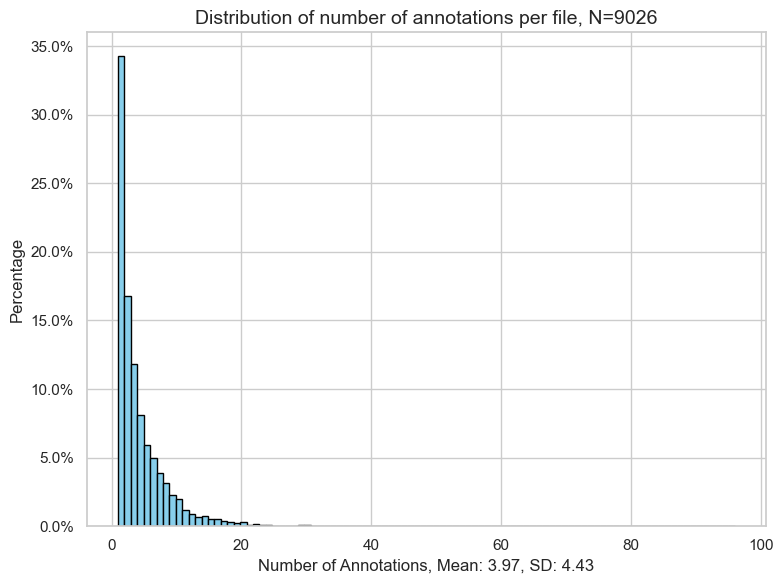

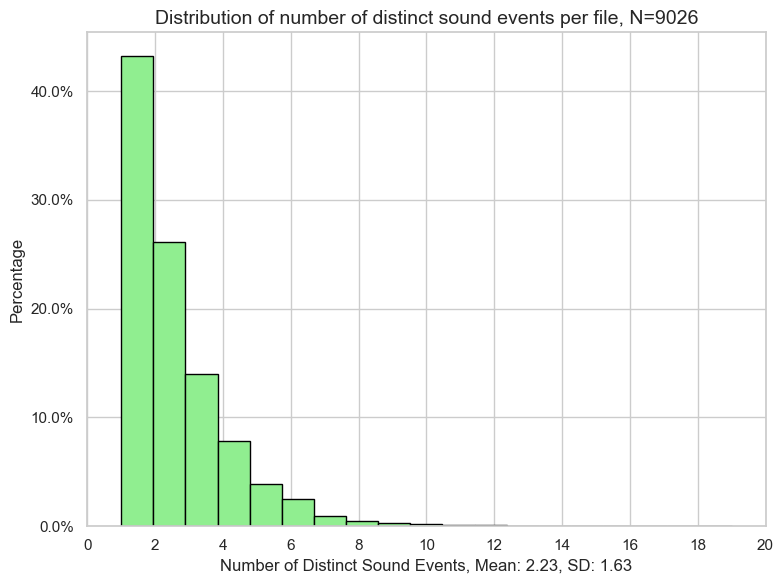

In [10]:
n_annotations_per_file_values = list(n_annotations_per_file.values())
max_annotations_per_file = max(n_annotations_per_file_values)

n_distinct_sound_events_per_file_values = list(n_distinct_sound_events_per_file.values())
n_distinct_sound_events_per_file_values = [round(x) for x in n_distinct_sound_events_per_file_values]
max_distinct_sound_events_per_file = max(n_distinct_sound_events_per_file_values)

# Set a nicer style using seaborn
sns.set(style="whitegrid")

# Calculate statistics
n_annotations_mean, n_annotations_sd = np.mean(n_annotations_per_file_values), np.std(n_annotations_per_file_values)
n_events_mean, n_events_sd = np.mean(n_distinct_sound_events_per_file_values), np.std(n_distinct_sound_events_per_file_values)


# Plot n_annotations per file
plt.figure(figsize=(8, 6))
plt.hist(n_annotations_per_file_values, bins=max_annotations_per_file, color='skyblue', edgecolor='black', weights=np.ones(len(n_annotations_per_file_values)) / len(n_annotations_per_file_values))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title(f"Distribution of number of annotations per file, N={len(n_annotations_per_file_values)}", fontsize=14)
plt.xlabel(f"Number of Annotations, Mean: {n_annotations_mean:.2f}, SD: {n_annotations_sd:.2f}", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.tight_layout()
plt.show()

# Plot offset differences
plt.figure(figsize=(8, 6))
plt.hist(n_distinct_sound_events_per_file_values, bins=max_distinct_sound_events_per_file, color='lightgreen', edgecolor='black', weights=np.ones(len(n_distinct_sound_events_per_file_values)) / len(n_distinct_sound_events_per_file_values))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(ticks=range(0, 22, 2))
plt.title(f"Distribution of number of distinct sound events per file, N={len(n_distinct_sound_events_per_file_values)}", fontsize=14)
plt.xlabel(f"Number of Distinct Sound Events, Mean: {n_events_mean:.2f}, SD: {n_events_sd:.2f}", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
# For calculations of TTR and number of spelling errors
spell = SpellChecker()

def calculate_ttr(text):

    tokens = text.split()
    unique_words = set(tokens)

    ttr = len(unique_words) / len(tokens) if tokens else 0
    return ttr

In [12]:
annotator_qualities = {}

annotations_grouped_by_annotator = annotations.groupby('annotator').agg(lambda x: list(x)).reset_index()

for annotator in annotations_grouped_by_annotator['annotator'].unique():
    # Per annotator
    annotator_qualities[annotator] = {'ttr': None, 'errors': None, 'words': None}

    annotator_annotations = annotations_grouped_by_annotator[annotations_grouped_by_annotator['annotator'] == annotator]

    ttr_values = []
    errors = []
    n_words = []

    for texts in annotator_annotations['text'].values:
        for text in texts:
            # Per single annotation text of annotator

            ttr = calculate_ttr(text)
            misspelled = spell.unknown(text.split())

            errors.append(len(misspelled))
            ttr_values.append(ttr)
            n_words.append(len(text.split()))

    annotator_qualities[annotator]['ttr'] = np.array(ttr_values)
    annotator_qualities[annotator]['errors'] = np.array(errors)
    annotator_qualities[annotator]['n_words'] = np.array(n_words)

In [13]:
avg_ttrs = []
avg_errors = []
avg_n_words = []
for annotator, qualities in annotator_qualities.items():
    ttr = qualities['ttr']
    errors = qualities['errors']
    n_words = qualities['n_words']

    avg_ttr = np.average(ttr)
    avg_error = np.average(errors)
    avg_n_word = np.average(n_words)

    annotator_qualities[annotator]['avg_ttr'] = avg_ttr
    avg_ttrs.append(avg_ttr)
    annotator_qualities[annotator]['avg_errors'] = avg_error
    avg_errors.append(avg_error)
    annotator_qualities[annotator]['avg_n_words'] = avg_n_word
    avg_n_words.append(avg_n_word)

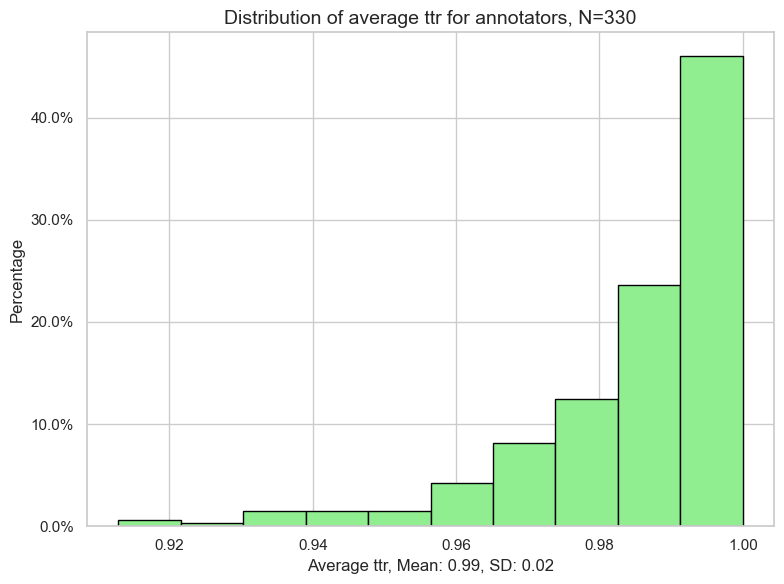

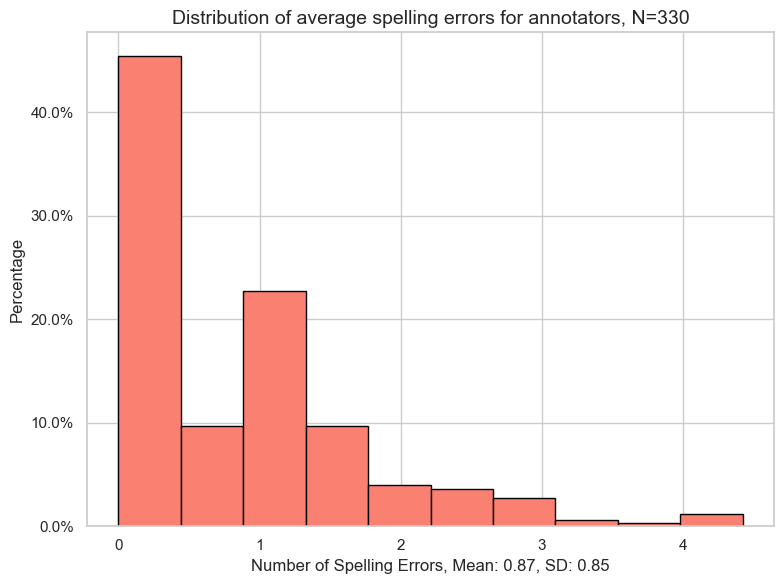

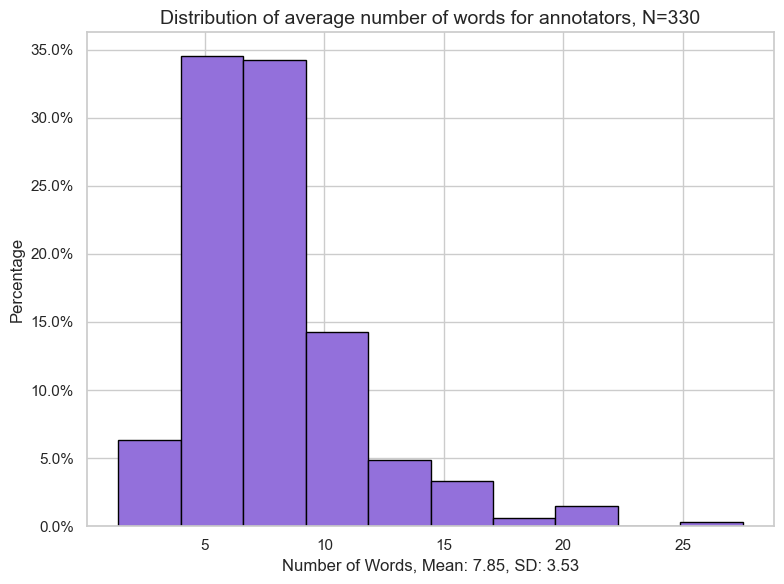

In [14]:
# Set a nicer style using seaborn
sns.set(style="whitegrid")

# Calculate statistics
ttr_mean, ttr_sd = np.mean(avg_ttrs), np.std(avg_ttrs)
errors_mean, errors_sd = np.mean(avg_errors), np.std(avg_errors)
words_mean, words_sd = np.mean(avg_n_words), np.std(avg_n_words)


# Plot average ttr for annotators
plt.figure(figsize=(8, 6))
plt.hist(avg_ttrs, bins=10, color='lightgreen', edgecolor='black', weights=np.ones(len(avg_ttrs)) / len(avg_ttrs))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title(f"Distribution of average ttr for annotators, N={len(avg_ttrs)}", fontsize=14)
plt.xlabel(f"Average ttr, Mean: {ttr_mean:.2f}, SD: {ttr_sd:.2f}", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.tight_layout()
plt.show()

# Plot average errors for annotators
plt.figure(figsize=(8, 6))
plt.hist(avg_errors, bins=10, color='salmon', edgecolor='black', weights=np.ones(len(avg_errors)) / len(avg_errors))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title(f"Distribution of average spelling errors for annotators, N={len(avg_errors)}", fontsize=14)
plt.xlabel(f"Number of Spelling Errors, Mean: {errors_mean:.2f}, SD: {errors_sd:.2f}", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.tight_layout()
plt.show()

# Plot average length for annotators
plt.figure(figsize=(8, 6))
plt.hist(avg_n_words, bins=10, color='mediumpurple', edgecolor='black', weights=np.ones(len(avg_n_words)) / len(avg_n_words))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title(f"Distribution of average number of words for annotators, N={len(avg_n_words)}", fontsize=14)
plt.xlabel(f"Number of Words, Mean: {words_mean:.2f}, SD: {words_sd:.2f}", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.tight_layout()
plt.show()

